In [1]:
%%rqalpha -h
""

UsageError: Cell magic `%%rqalpha` not found.


In [2]:
%load_ext rqalpha

In [3]:
#测试模块！！！
#from kivy.app import App

#import kivy 
#print ("kivy",kivy.__version__)

import talib
print ("talib",talib.__version__)

import matplotlib 
print ("matplotlib",matplotlib.__version__)

import numpy 
print ("numpy",numpy.__version__)

import funcat  #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
print("funcat",funcat.__version__)

import tushare  #TUSHARE数据连接更新。
print ("tushare",tushare.__version__)

import rqalpha #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
print("rqalpha",rqalpha.__version__)

import time

import datetime #读取/设定数据库时间区域，当前股票，选股时间段。 

import pytdx  #通达信数据更新模块到QUANTAXIS的mongoDB
#print ("pytdx",pytdx.__version__)



talib 0.4.17
matplotlib 3.0.2
numpy 1.15.4
funcat 0.3.2
tushare 1.2.16
rqalpha 3.2.0


2018-01-02 WARN 订单创建失败: 下单量为0。
2018-01-03 WARN 订单创建失败: 下单量为0。
2018-01-04 WARN 订单创建失败: 下单量为0。
2018-01-05 WARN 订单创建失败: 下单量为0。
2018-01-08 WARN 订单创建失败: 下单量为0。
2018-01-09 WARN 订单创建失败: 下单量为0。
2018-01-10 WARN 订单创建失败: 下单量为0。
2018-01-11 WARN 订单创建失败: 下单量为0。
2018-01-12 WARN 订单创建失败: 下单量为0。
2018-01-15 WARN 订单创建失败: 下单量为0。
2018-01-16 WARN 订单创建失败: 下单量为0。
2018-01-17 WARN 订单创建失败: 下单量为0。
2018-01-18 WARN 订单创建失败: 下单量为0。
2018-01-19 WARN 订单创建失败: 下单量为0。
2018-01-22 WARN 订单创建失败: 下单量为0。
2018-01-23 WARN 订单创建失败: 下单量为0。
2018-01-24 WARN 订单创建失败: 下单量为0。
2018-01-25 WARN 订单创建失败: 下单量为0。
2018-01-26 WARN 订单创建失败: 下单量为0。
2018-01-29 WARN 订单创建失败: 下单量为0。
2018-01-30 WARN 订单创建失败: 下单量为0。
2018-01-31 WARN 订单创建失败: 下单量为0。
2018-02-01 WARN 订单创建失败: 下单量为0。
2018-02-02 WARN 订单创建失败: 下单量为0。
2018-02-05 WARN 订单创建失败: 下单量为0。
2018-02-06 WARN 订单创建失败: 下单量为0。
2018-02-07 WARN 订单创建失败: 下单量为0。
2018-02-08 WARN 订单创建失败: 下单量为0。
2018-02-09 WARN 订单创建失败: 下单量为0。
2018-02-12 WARN 订单创建失败: 下单量为0。
2018-02-13 WARN 订单创建失败: 下单量为0。
2018-02-14 WARN 订单创建失败: 下单量为0。
2018-02-

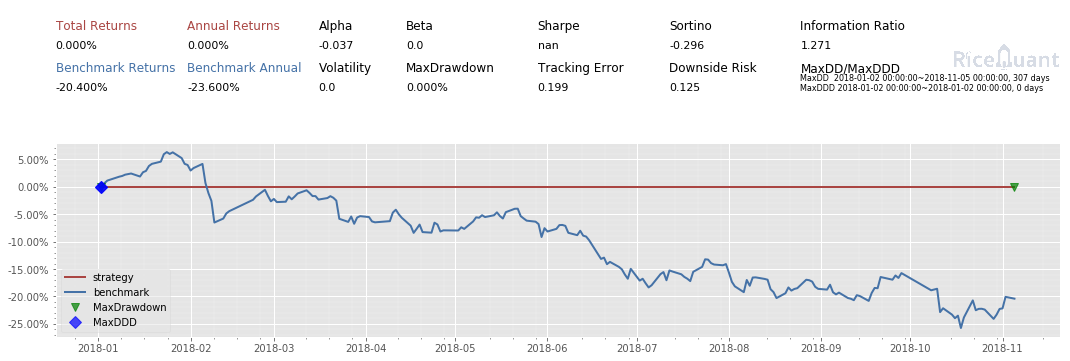

In [5]:
%%rqalpha -s 20180101 -e 20181105 -p -bm 000001.XSHG --account stock 100000

from rqalpha import *

import numpy as np
import time 
import datetime
import pandas as pd
import sys

def init(context):
    #沪深300为目标
    context.s1 ='000300.XSHG'
    context.judge=0
    context.judge2=0
    context.judge3=0
    
# before_trading此函数会在每天策略交易开始前被调用，当天只会被调用一次
def my_func(context, bar_dict):
    
    test_data2=history_bars(context.s1, 120, '1m', 'close')
    #处理原始数据
    test_data3=np.log(test_data2/test_data2[0])
    
    #进行多次项回归：
    tar=test_data3
    count=0
    m=3 #从第3次多项式拟合开始进行梯度上升寻找最好的回归项次
    while count==0:
        x = np.arange(0, len(tar), 1)
        y = np.array(tar)
        z1 = np.polyfit(x, y, m)
        p1 = np.poly1d(z1)
        yvals=p1(x)
        #计算出残差的VAR
        vvar=(yvals-y).var()
        if m==3:
            vvar1=vvar
            p2=p1
            m+=1
        else:
            if vvar<vvar1:
                vvar1=vvar
                p2=p1
                m+=1
            else:
                count+=1
    
    #进行当前时间段的求导
    context.judge=p2.deriv(1)(len(tar))
    context.judge2=p2.deriv(2)(len(tar))
    context.judge3=p2.deriv(3)(len(tar))
    return  context.judge
    
def before_trading(context):

    pass

   
# 你选择的证券的数据更新将会触发此段逻辑，例如日或分钟历史数据切片或者是实时数据切片更新
def handle_bar(context, bar_dict):

    start_date=context.now
    u = datetime.datetime.strftime(start_date, '%Y-%m-%d %H:%M:%S')
    u = datetime.datetime.strptime(u, '%Y-%m-%d %H:%M:%S')
    s=datetime.datetime(year=u.year , month = u.month, day = u.day, hour=11, minute=30,second=0).strftime('%Y-%m-%d %H:%M:%S')
    s1=datetime.datetime(year=u.year , month = u.month, day = u.day, hour=14, minute=59,second=0).strftime('%Y-%m-%d %H:%M:%S')
    u=datetime.datetime(year=u.year , month = u.month, day = u.day, hour=u.hour, minute=u.minute,second=u.second).strftime('%Y-%m-%d %H:%M:%S')
    if u>s and u<s1:
        my_func(context, bar_dict)
        if context.judge>0 and context.judge2>0 and context.judge3>0 :
            order_target_percent(context.s1, 0.98)
        elif context.judge<0:
            order_target_percent(context.s1, 0)
    if u>s1:
        order_target_percent(context.s1, 0)
        
def stoploss(context,bar_dict):

    for stock in context.portfolio.positions:
        if bar_dict[stock].last<context.portfolio.positions[stock].avg_price*0.97:
            order_target_percent(stock, 0)
        if bar_dict[stock].last>context.portfolio.positions[stock].avg_price*1.3:
            order_target_percent(stock, 0)            

# after_trading函数会在每天交易结束后被调用，当天只会被调用一次
def after_trading(context):
    pass



In [10]:
%load_ext rqalpha

The rqalpha extension is already loaded. To reload it, use:
  %reload_ext rqalpha


2005-01-04 WARN 订单创建失败: 下单量为0。
2005-01-05 WARN 订单创建失败: 下单量为0。
2005-01-06 WARN 订单创建失败: 下单量为0。
2005-01-07 WARN 订单创建失败: 下单量为0。
2005-01-10 WARN 订单创建失败: 下单量为0。
2005-01-11 WARN 订单创建失败: 下单量为0。
2005-01-12 WARN 订单创建失败: 下单量为0。
2005-01-13 WARN 订单创建失败: 下单量为0。
2005-01-14 WARN 订单创建失败: 下单量为0。
2005-01-17 WARN 订单创建失败: 下单量为0。
2005-01-18 WARN 订单创建失败: 下单量为0。
2005-01-19 WARN 订单创建失败: 下单量为0。
2005-01-20 WARN 订单创建失败: 下单量为0。
2005-01-21 WARN 订单创建失败: 下单量为0。
2005-01-24 WARN 订单创建失败: 下单量为0。
2005-01-25 WARN 订单创建失败: 下单量为0。
2005-01-26 WARN 订单创建失败: 下单量为0。
2005-01-27 WARN 订单创建失败: 下单量为0。
2005-01-28 WARN 订单创建失败: 下单量为0。
2005-01-31 WARN 订单创建失败: 下单量为0。
2005-02-01 WARN 订单创建失败: 下单量为0。
2005-02-02 WARN 订单创建失败: 下单量为0。
2005-02-03 WARN 订单创建失败: 下单量为0。
2005-02-04 WARN 订单创建失败: 下单量为0。
2005-02-16 WARN 订单创建失败: 下单量为0。
2005-02-17 WARN 订单创建失败: 下单量为0。
2005-02-18 WARN 订单创建失败: 下单量为0。
2005-02-21 WARN 订单创建失败: 下单量为0。
2005-02-22 WARN 订单创建失败: 下单量为0。
2005-02-23 WARN 订单创建失败: 下单量为0。
2005-02-24 WARN 订单创建失败: 下单量为0。
2005-02-25 WARN 订单创建失败: 下单量为0。
2005-02-

2006-02-15 WARN 订单创建失败: 下单量为0。
2006-02-16 WARN 订单创建失败: 下单量为0。
2006-02-17 WARN 订单创建失败: 下单量为0。
2006-02-20 WARN 订单创建失败: 下单量为0。
2006-02-21 WARN 订单创建失败: 下单量为0。
2006-02-22 WARN 订单创建失败: 下单量为0。
2006-02-23 WARN 订单创建失败: 下单量为0。
2006-02-24 WARN 订单创建失败: 下单量为0。
2006-02-27 WARN 订单创建失败: 下单量为0。
2006-02-28 WARN 订单创建失败: 下单量为0。
2006-03-01 WARN 订单创建失败: 下单量为0。
2006-03-02 WARN 订单创建失败: 下单量为0。
2006-03-03 WARN 订单创建失败: 下单量为0。
2006-03-06 WARN 订单创建失败: 下单量为0。
2006-03-07 WARN 订单创建失败: 下单量为0。
2006-03-08 WARN 订单创建失败: 下单量为0。
2006-03-09 WARN 订单创建失败: 下单量为0。
2006-03-10 WARN 订单创建失败: 下单量为0。
2006-03-13 WARN 订单创建失败: 下单量为0。
2006-03-14 WARN 订单创建失败: 下单量为0。
2006-03-15 WARN 订单创建失败: 下单量为0。
2006-03-16 WARN 订单创建失败: 下单量为0。
2006-03-17 WARN 订单创建失败: 下单量为0。
2006-03-20 WARN 订单创建失败: 下单量为0。
2006-03-21 WARN 订单创建失败: 下单量为0。
2006-03-22 WARN 订单创建失败: 下单量为0。
2006-03-23 WARN 订单创建失败: 下单量为0。
2006-03-24 WARN 订单创建失败: 下单量为0。
2006-03-27 WARN 订单创建失败: 下单量为0。
2006-03-28 WARN 订单创建失败: 下单量为0。
2006-03-29 WARN 订单创建失败: 下单量为0。
2006-03-30 WARN 订单创建失败: 下单量为0。
2006-03-

2007-03-19 WARN 订单创建失败: 下单量为0。
2007-03-20 WARN 订单创建失败: 下单量为0。
2007-03-21 WARN 订单创建失败: 下单量为0。
2007-03-22 WARN 订单创建失败: 下单量为0。
2007-03-23 WARN 订单创建失败: 下单量为0。
2007-03-26 WARN 订单创建失败: 下单量为0。
2007-03-27 WARN 订单创建失败: 下单量为0。
2007-03-28 WARN 订单创建失败: 下单量为0。
2007-03-29 WARN 订单创建失败: 下单量为0。
2007-03-30 WARN 订单创建失败: 下单量为0。
2007-04-02 WARN 订单创建失败: 下单量为0。
2007-04-03 WARN 订单创建失败: 下单量为0。
2007-04-04 WARN 订单创建失败: 下单量为0。
2007-04-05 WARN 订单创建失败: 下单量为0。
2007-04-06 WARN 订单创建失败: 下单量为0。
2007-04-09 WARN 订单创建失败: 下单量为0。
2007-04-10 WARN 订单创建失败: 下单量为0。
2007-04-11 WARN 订单创建失败: 下单量为0。
2007-04-12 WARN 订单创建失败: 下单量为0。
2007-04-13 WARN 订单创建失败: 下单量为0。
2007-04-16 WARN 订单创建失败: 下单量为0。
2007-04-17 WARN 订单创建失败: 下单量为0。
2007-04-18 WARN 订单创建失败: 下单量为0。
2007-04-19 WARN 订单创建失败: 下单量为0。
2007-04-20 WARN 订单创建失败: 下单量为0。
2007-04-23 WARN 订单创建失败: 下单量为0。
2007-04-24 WARN 订单创建失败: 下单量为0。
2007-04-25 WARN 订单创建失败: 下单量为0。
2007-04-26 WARN 订单创建失败: 下单量为0。
2007-04-27 WARN 订单创建失败: 下单量为0。
2007-04-30 WARN 订单创建失败: 下单量为0。
2007-05-08 WARN 订单创建失败: 下单量为0。
2007-05-

2008-04-17 WARN 订单创建失败: 下单量为0。
2008-04-18 WARN 订单创建失败: 下单量为0。
2008-04-21 WARN 订单创建失败: 下单量为0。
2008-04-22 WARN 订单创建失败: 下单量为0。
2008-04-23 WARN 订单创建失败: 下单量为0。
2008-04-24 WARN 订单创建失败: 下单量为0。
2008-04-25 WARN 订单创建失败: 下单量为0。
2008-04-28 WARN 订单创建失败: 下单量为0。
2008-04-29 WARN 订单创建失败: 下单量为0。
2008-04-30 WARN 订单创建失败: 下单量为0。
2008-05-05 WARN 订单创建失败: 下单量为0。
2008-05-06 WARN 订单创建失败: 下单量为0。
2008-05-07 WARN 订单创建失败: 下单量为0。
2008-05-08 WARN 订单创建失败: 下单量为0。
2008-05-09 WARN 订单创建失败: 下单量为0。
2008-05-12 WARN 订单创建失败: 下单量为0。
2008-05-13 WARN 订单创建失败: 下单量为0。
2008-05-14 WARN 订单创建失败: 下单量为0。
2008-05-15 WARN 订单创建失败: 下单量为0。
2008-05-16 WARN 订单创建失败: 下单量为0。
2008-05-19 WARN 订单创建失败: 下单量为0。
2008-05-20 WARN 订单创建失败: 下单量为0。
2008-05-21 WARN 订单创建失败: 下单量为0。
2008-05-22 WARN 订单创建失败: 下单量为0。
2008-05-23 WARN 订单创建失败: 下单量为0。
2008-05-26 WARN 订单创建失败: 下单量为0。
2008-05-27 WARN 订单创建失败: 下单量为0。
2008-05-28 WARN 订单创建失败: 下单量为0。
2008-05-29 WARN 订单创建失败: 下单量为0。
2008-05-30 WARN 订单创建失败: 下单量为0。
2008-06-02 WARN 订单创建失败: 下单量为0。
2008-06-03 WARN 订单创建失败: 下单量为0。
2008-06-

2009-05-19 WARN 订单创建失败: 下单量为0。
2009-05-20 WARN 订单创建失败: 下单量为0。
2009-05-21 WARN 订单创建失败: 下单量为0。
2009-05-22 WARN 订单创建失败: 下单量为0。
2009-05-25 WARN 订单创建失败: 下单量为0。
2009-05-26 WARN 订单创建失败: 下单量为0。
2009-05-27 WARN 订单创建失败: 下单量为0。
2009-06-01 WARN 订单创建失败: 下单量为0。
2009-06-02 WARN 订单创建失败: 下单量为0。
2009-06-03 WARN 订单创建失败: 下单量为0。
2009-06-04 WARN 订单创建失败: 下单量为0。
2009-06-05 WARN 订单创建失败: 下单量为0。
2009-06-08 WARN 订单创建失败: 下单量为0。
2009-06-09 WARN 订单创建失败: 下单量为0。
2009-06-10 WARN 订单创建失败: 下单量为0。
2009-06-11 WARN 订单创建失败: 下单量为0。
2009-06-12 WARN 订单创建失败: 下单量为0。
2009-06-15 WARN 订单创建失败: 下单量为0。
2009-06-16 WARN 订单创建失败: 下单量为0。
2009-06-17 WARN 订单创建失败: 下单量为0。
2009-06-18 WARN 订单创建失败: 下单量为0。
2009-06-19 WARN 订单创建失败: 下单量为0。
2009-06-22 WARN 订单创建失败: 下单量为0。
2009-06-23 WARN 订单创建失败: 下单量为0。
2009-06-24 WARN 订单创建失败: 下单量为0。
2009-06-25 WARN 订单创建失败: 下单量为0。
2009-06-26 WARN 订单创建失败: 下单量为0。
2009-06-29 WARN 订单创建失败: 下单量为0。
2009-06-30 WARN 订单创建失败: 下单量为0。
2009-07-01 WARN 订单创建失败: 下单量为0。
2009-07-02 WARN 订单创建失败: 下单量为0。
2009-07-03 WARN 订单创建失败: 下单量为0。
2009-07-

2010-06-21 WARN 订单创建失败: 下单量为0。
2010-06-22 WARN 订单创建失败: 下单量为0。
2010-06-23 WARN 订单创建失败: 下单量为0。
2010-06-24 WARN 订单创建失败: 下单量为0。
2010-06-25 WARN 订单创建失败: 下单量为0。
2010-06-28 WARN 订单创建失败: 下单量为0。
2010-06-29 WARN 订单创建失败: 下单量为0。
2010-06-30 WARN 订单创建失败: 下单量为0。
2010-07-01 WARN 订单创建失败: 下单量为0。
2010-07-02 WARN 订单创建失败: 下单量为0。
2010-07-05 WARN 订单创建失败: 下单量为0。
2010-07-06 WARN 订单创建失败: 下单量为0。
2010-07-07 WARN 订单创建失败: 下单量为0。
2010-07-08 WARN 订单创建失败: 下单量为0。
2010-07-09 WARN 订单创建失败: 下单量为0。
2010-07-12 WARN 订单创建失败: 下单量为0。
2010-07-13 WARN 订单创建失败: 下单量为0。
2010-07-14 WARN 订单创建失败: 下单量为0。
2010-07-15 WARN 订单创建失败: 下单量为0。
2010-07-16 WARN 订单创建失败: 下单量为0。
2010-07-19 WARN 订单创建失败: 下单量为0。
2010-07-20 WARN 订单创建失败: 下单量为0。
2010-07-21 WARN 订单创建失败: 下单量为0。
2010-07-22 WARN 订单创建失败: 下单量为0。
2010-07-23 WARN 订单创建失败: 下单量为0。
2010-07-26 WARN 订单创建失败: 下单量为0。
2010-07-27 WARN 订单创建失败: 下单量为0。
2010-07-28 WARN 订单创建失败: 下单量为0。
2010-07-29 WARN 订单创建失败: 下单量为0。
2010-07-30 WARN 订单创建失败: 下单量为0。
2010-08-02 WARN 订单创建失败: 下单量为0。
2010-08-03 WARN 订单创建失败: 下单量为0。
2010-08-

2011-07-21 WARN 订单创建失败: 下单量为0。
2011-07-22 WARN 订单创建失败: 下单量为0。
2011-07-25 WARN 订单创建失败: 下单量为0。
2011-07-26 WARN 订单创建失败: 下单量为0。
2011-07-27 WARN 订单创建失败: 下单量为0。
2011-07-28 WARN 订单创建失败: 下单量为0。
2011-07-29 WARN 订单创建失败: 下单量为0。
2011-08-01 WARN 订单创建失败: 下单量为0。
2011-08-02 WARN 订单创建失败: 下单量为0。
2011-08-03 WARN 订单创建失败: 下单量为0。
2011-08-04 WARN 订单创建失败: 下单量为0。
2011-08-05 WARN 订单创建失败: 下单量为0。
2011-08-08 WARN 订单创建失败: 下单量为0。
2011-08-09 WARN 订单创建失败: 下单量为0。
2011-08-10 WARN 订单创建失败: 下单量为0。
2011-08-11 WARN 订单创建失败: 下单量为0。
2011-08-12 WARN 订单创建失败: 下单量为0。
2011-08-15 WARN 订单创建失败: 下单量为0。
2011-08-16 WARN 订单创建失败: 下单量为0。
2011-08-17 WARN 订单创建失败: 下单量为0。
2011-08-18 WARN 订单创建失败: 下单量为0。
2011-08-19 WARN 订单创建失败: 下单量为0。
2011-08-22 WARN 订单创建失败: 下单量为0。
2011-08-23 WARN 订单创建失败: 下单量为0。
2011-08-24 WARN 订单创建失败: 下单量为0。
2011-08-25 WARN 订单创建失败: 下单量为0。
2011-08-26 WARN 订单创建失败: 下单量为0。
2011-08-29 WARN 订单创建失败: 下单量为0。
2011-08-30 WARN 订单创建失败: 下单量为0。
2011-08-31 WARN 订单创建失败: 下单量为0。
2011-09-01 WARN 订单创建失败: 下单量为0。
2011-09-02 WARN 订单创建失败: 下单量为0。
2011-09-

2012-08-22 WARN 订单创建失败: 下单量为0。
2012-08-23 WARN 订单创建失败: 下单量为0。
2012-08-24 WARN 订单创建失败: 下单量为0。
2012-08-27 WARN 订单创建失败: 下单量为0。
2012-08-28 WARN 订单创建失败: 下单量为0。
2012-08-29 WARN 订单创建失败: 下单量为0。
2012-08-30 WARN 订单创建失败: 下单量为0。
2012-08-31 WARN 订单创建失败: 下单量为0。
2012-09-03 WARN 订单创建失败: 下单量为0。
2012-09-04 WARN 订单创建失败: 下单量为0。
2012-09-05 WARN 订单创建失败: 下单量为0。
2012-09-06 WARN 订单创建失败: 下单量为0。
2012-09-07 WARN 订单创建失败: 下单量为0。
2012-09-10 WARN 订单创建失败: 下单量为0。
2012-09-11 WARN 订单创建失败: 下单量为0。
2012-09-12 WARN 订单创建失败: 下单量为0。
2012-09-13 WARN 订单创建失败: 下单量为0。
2012-09-14 WARN 订单创建失败: 下单量为0。
2012-09-17 WARN 订单创建失败: 下单量为0。
2012-09-18 WARN 订单创建失败: 下单量为0。
2012-09-19 WARN 订单创建失败: 下单量为0。
2012-09-20 WARN 订单创建失败: 下单量为0。
2012-09-21 WARN 订单创建失败: 下单量为0。
2012-09-24 WARN 订单创建失败: 下单量为0。
2012-09-25 WARN 订单创建失败: 下单量为0。
2012-09-26 WARN 订单创建失败: 下单量为0。
2012-09-27 WARN 订单创建失败: 下单量为0。
2012-09-28 WARN 订单创建失败: 下单量为0。
2012-10-08 WARN 订单创建失败: 下单量为0。
2012-10-09 WARN 订单创建失败: 下单量为0。
2012-10-10 WARN 订单创建失败: 下单量为0。
2012-10-11 WARN 订单创建失败: 下单量为0。
2012-10-

2013-09-30 WARN 订单创建失败: 下单量为0。
2013-10-08 WARN 订单创建失败: 下单量为0。
2013-10-09 WARN 订单创建失败: 下单量为0。
2013-10-10 WARN 订单创建失败: 下单量为0。
2013-10-11 WARN 订单创建失败: 下单量为0。
2013-10-14 WARN 订单创建失败: 下单量为0。
2013-10-15 WARN 订单创建失败: 下单量为0。
2013-10-16 WARN 订单创建失败: 下单量为0。
2013-10-17 WARN 订单创建失败: 下单量为0。
2013-10-18 WARN 订单创建失败: 下单量为0。
2013-10-21 WARN 订单创建失败: 下单量为0。
2013-10-22 WARN 订单创建失败: 下单量为0。
2013-10-23 WARN 订单创建失败: 下单量为0。
2013-10-24 WARN 订单创建失败: 下单量为0。
2013-10-25 WARN 订单创建失败: 下单量为0。
2013-10-28 WARN 订单创建失败: 下单量为0。
2013-10-29 WARN 订单创建失败: 下单量为0。
2013-10-30 WARN 订单创建失败: 下单量为0。
2013-10-31 WARN 订单创建失败: 下单量为0。
2013-11-01 WARN 订单创建失败: 下单量为0。
2013-11-04 WARN 订单创建失败: 下单量为0。
2013-11-05 WARN 订单创建失败: 下单量为0。
2013-11-06 WARN 订单创建失败: 下单量为0。
2013-11-07 WARN 订单创建失败: 下单量为0。
2013-11-08 WARN 订单创建失败: 下单量为0。
2013-11-11 WARN 订单创建失败: 下单量为0。
2013-11-12 WARN 订单创建失败: 下单量为0。
2013-11-13 WARN 订单创建失败: 下单量为0。
2013-11-14 WARN 订单创建失败: 下单量为0。
2013-11-15 WARN 订单创建失败: 下单量为0。
2013-11-18 WARN 订单创建失败: 下单量为0。
2013-11-19 WARN 订单创建失败: 下单量为0。
2013-11-

2014-11-04 WARN 订单创建失败: 下单量为0。
2014-11-05 WARN 订单创建失败: 下单量为0。
2014-11-06 WARN 订单创建失败: 下单量为0。
2014-11-07 WARN 订单创建失败: 下单量为0。
2014-11-10 WARN 订单创建失败: 下单量为0。
2014-11-11 WARN 订单创建失败: 下单量为0。
2014-11-12 WARN 订单创建失败: 下单量为0。
2014-11-13 WARN 订单创建失败: 下单量为0。
2014-11-14 WARN 订单创建失败: 下单量为0。
2014-11-17 WARN 订单创建失败: 下单量为0。
2014-11-18 WARN 订单创建失败: 下单量为0。
2014-11-19 WARN 订单创建失败: 下单量为0。
2014-11-20 WARN 订单创建失败: 下单量为0。
2014-11-21 WARN 订单创建失败: 下单量为0。
2014-11-24 WARN 订单创建失败: 下单量为0。
2014-11-25 WARN 订单创建失败: 下单量为0。
2014-11-26 WARN 订单创建失败: 下单量为0。
2014-11-27 WARN 订单创建失败: 下单量为0。
2014-11-28 WARN 订单创建失败: 下单量为0。
2014-12-01 WARN 订单创建失败: 下单量为0。
2014-12-02 WARN 订单创建失败: 下单量为0。
2014-12-03 WARN 订单创建失败: 下单量为0。
2014-12-04 WARN 订单创建失败: 下单量为0。
2014-12-05 WARN 订单创建失败: 下单量为0。
2014-12-08 WARN 订单创建失败: 下单量为0。
2014-12-09 WARN 订单创建失败: 下单量为0。
2014-12-10 WARN 订单创建失败: 下单量为0。
2014-12-11 WARN 订单创建失败: 下单量为0。
2014-12-12 WARN 订单创建失败: 下单量为0。
2014-12-15 WARN 订单创建失败: 下单量为0。
2014-12-16 WARN 订单创建失败: 下单量为0。
2014-12-17 WARN 订单创建失败: 下单量为0。
2014-12-

2015-12-03 WARN 订单创建失败: 下单量为0。
2015-12-04 WARN 订单创建失败: 下单量为0。
2015-12-07 WARN 订单创建失败: 下单量为0。
2015-12-08 WARN 订单创建失败: 下单量为0。
2015-12-09 WARN 订单创建失败: 下单量为0。
2015-12-10 WARN 订单创建失败: 下单量为0。
2015-12-11 WARN 订单创建失败: 下单量为0。
2015-12-14 WARN 订单创建失败: 下单量为0。
2015-12-15 WARN 订单创建失败: 下单量为0。
2015-12-16 WARN 订单创建失败: 下单量为0。
2015-12-17 WARN 订单创建失败: 下单量为0。
2015-12-18 WARN 订单创建失败: 下单量为0。
2015-12-21 WARN 订单创建失败: 下单量为0。
2015-12-22 WARN 订单创建失败: 下单量为0。
2015-12-23 WARN 订单创建失败: 下单量为0。
2015-12-24 WARN 订单创建失败: 下单量为0。
2015-12-25 WARN 订单创建失败: 下单量为0。
2015-12-28 WARN 订单创建失败: 下单量为0。
2015-12-29 WARN 订单创建失败: 下单量为0。
2015-12-30 WARN 订单创建失败: 下单量为0。
2015-12-31 WARN 订单创建失败: 下单量为0。
2016-01-04 WARN 订单创建失败: 下单量为0。
2016-01-05 WARN 订单创建失败: 下单量为0。
2016-01-06 WARN 订单创建失败: 下单量为0。
2016-01-07 WARN 订单创建失败: 下单量为0。
2016-01-08 WARN 订单创建失败: 下单量为0。
2016-01-11 WARN 订单创建失败: 下单量为0。
2016-01-12 WARN 订单创建失败: 下单量为0。
2016-01-13 WARN 订单创建失败: 下单量为0。
2016-01-14 WARN 订单创建失败: 下单量为0。
2016-01-15 WARN 订单创建失败: 下单量为0。
2016-01-18 WARN 订单创建失败: 下单量为0。
2016-01-

2017-01-03 WARN 订单创建失败: 下单量为0。
2017-01-04 WARN 订单创建失败: 下单量为0。
2017-01-05 WARN 订单创建失败: 下单量为0。
2017-01-06 WARN 订单创建失败: 下单量为0。
2017-01-09 WARN 订单创建失败: 下单量为0。
2017-01-10 WARN 订单创建失败: 下单量为0。
2017-01-11 WARN 订单创建失败: 下单量为0。
2017-01-12 WARN 订单创建失败: 下单量为0。
2017-01-13 WARN 订单创建失败: 下单量为0。
2017-01-16 WARN 订单创建失败: 下单量为0。
2017-01-17 WARN 订单创建失败: 下单量为0。
2017-01-18 WARN 订单创建失败: 下单量为0。
2017-01-19 WARN 订单创建失败: 下单量为0。
2017-01-20 WARN 订单创建失败: 下单量为0。
2017-01-23 WARN 订单创建失败: 下单量为0。
2017-01-24 WARN 订单创建失败: 下单量为0。
2017-01-25 WARN 订单创建失败: 下单量为0。
2017-01-26 WARN 订单创建失败: 下单量为0。
2017-02-03 WARN 订单创建失败: 下单量为0。
2017-02-06 WARN 订单创建失败: 下单量为0。
2017-02-07 WARN 订单创建失败: 下单量为0。
2017-02-08 WARN 订单创建失败: 下单量为0。
2017-02-09 WARN 订单创建失败: 下单量为0。
2017-02-10 WARN 订单创建失败: 下单量为0。
2017-02-13 WARN 订单创建失败: 下单量为0。
2017-02-14 WARN 订单创建失败: 下单量为0。
2017-02-15 WARN 订单创建失败: 下单量为0。
2017-02-16 WARN 订单创建失败: 下单量为0。
2017-02-17 WARN 订单创建失败: 下单量为0。
2017-02-20 WARN 订单创建失败: 下单量为0。
2017-02-21 WARN 订单创建失败: 下单量为0。
2017-02-22 WARN 订单创建失败: 下单量为0。
2017-02-

2018-01-31 WARN 订单创建失败: 下单量为0。
2018-02-01 WARN 订单创建失败: 下单量为0。
2018-02-02 WARN 订单创建失败: 下单量为0。
2018-02-05 WARN 订单创建失败: 下单量为0。
2018-02-06 WARN 订单创建失败: 下单量为0。
2018-02-07 WARN 订单创建失败: 下单量为0。
2018-02-08 WARN 订单创建失败: 下单量为0。
2018-02-09 WARN 订单创建失败: 下单量为0。
2018-02-12 WARN 订单创建失败: 下单量为0。
2018-02-13 WARN 订单创建失败: 下单量为0。
2018-02-14 WARN 订单创建失败: 下单量为0。
2018-02-22 WARN 订单创建失败: 下单量为0。
2018-02-23 WARN 订单创建失败: 下单量为0。
2018-02-26 WARN 订单创建失败: 下单量为0。
2018-02-27 WARN 订单创建失败: 下单量为0。
2018-02-28 WARN 订单创建失败: 下单量为0。
2018-03-01 WARN 订单创建失败: 下单量为0。
2018-03-02 WARN 订单创建失败: 下单量为0。
2018-03-05 WARN 订单创建失败: 下单量为0。
2018-03-06 WARN 订单创建失败: 下单量为0。
2018-03-07 WARN 订单创建失败: 下单量为0。
2018-03-08 WARN 订单创建失败: 下单量为0。
2018-03-09 WARN 订单创建失败: 下单量为0。
2018-03-12 WARN 订单创建失败: 下单量为0。
2018-03-13 WARN 订单创建失败: 下单量为0。
2018-03-14 WARN 订单创建失败: 下单量为0。
2018-03-15 WARN 订单创建失败: 下单量为0。
2018-03-16 WARN 订单创建失败: 下单量为0。
2018-03-19 WARN 订单创建失败: 下单量为0。
2018-03-20 WARN 订单创建失败: 下单量为0。
2018-03-21 WARN 订单创建失败: 下单量为0。
2018-03-22 WARN 订单创建失败: 下单量为0。
2018-03-

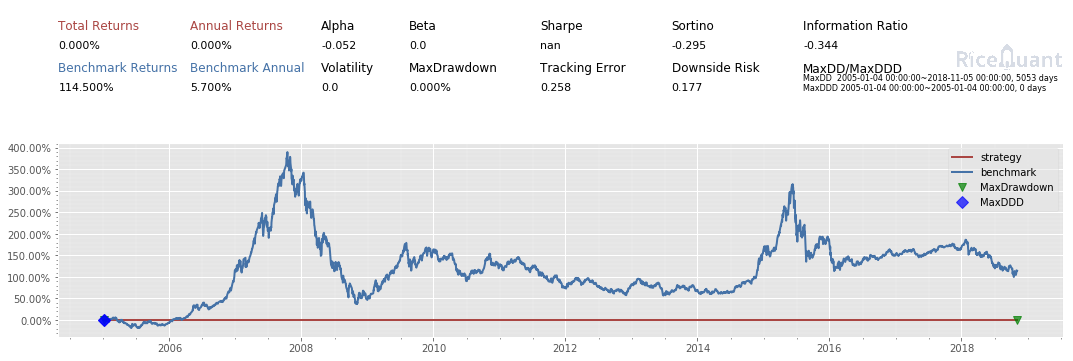

In [8]:
config = {
  "base": {
    "start_date": "2018-01-01",
    "end_date": "2018-11-05",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}


from rqalpha.api import *
from rqalpha import run_func

import numpy as np
import time 
import datetime
import pandas as pd
import sys

def init(context):
    #沪深300为目标
    context.s1 ='000300.XSHG'
    context.judge=0
    context.judge2=0
    context.judge3=0
    
# before_trading此函数会在每天策略交易开始前被调用，当天只会被调用一次
def my_func(context, bar_dict):
    
    test_data2=history_bars(context.s1, 120, '1m', 'close')
    #处理原始数据
    test_data3=np.log(test_data2/test_data2[0])
    
    #进行多次项回归：
    tar=test_data3
    count=0
    m=3#从第3次多项式拟合开始进行梯度上升寻找最好的回归项次
    while count==0:
        x = np.arange(0, len(tar), 1)
        y = np.array(tar)
        z1 = np.polyfit(x, y, m)
        p1 = np.poly1d(z1)
        yvals=p1(x)
        #计算出残差的VAR
        vvar=(yvals-y).var()
        if m==3:
            vvar1=vvar
            p2=p1
            m+=1
        else:
            if vvar<vvar1:
                vvar1=vvar
                p2=p1
                m+=1
            else:
                count+=1
    
    #进行当前时间段的求导
    context.judge=p2.deriv(1)(len(tar))
    context.judge2=p2.deriv(2)(len(tar))
    context.judge3=p2.deriv(3)(len(tar))
    return  context.judge
    
def before_trading(context):

    pass

   
# 你选择的证券的数据更新将会触发此段逻辑，例如日或分钟历史数据切片或者是实时数据切片更新
def handle_bar(context, bar_dict):

    start_date=context.now
    u = datetime.datetime.strftime(start_date, '%Y-%m-%d %H:%M:%S')
    u = datetime.datetime.strptime(u, '%Y-%m-%d %H:%M:%S')
    s=datetime.datetime(year=u.year , month = u.month, day = u.day, hour=11, minute=30,second=0).strftime('%Y-%m-%d %H:%M:%S')
    s1=datetime.datetime(year=u.year , month = u.month, day = u.day, hour=14, minute=59,second=0).strftime('%Y-%m-%d %H:%M:%S')
    u=datetime.datetime(year=u.year , month = u.month, day = u.day, hour=u.hour, minute=u.minute,second=u.second).strftime('%Y-%m-%d %H:%M:%S')
    if u>s and u<s1:
        my_func(context, bar_dict)
        if context.judge>0 and context.judge2>0 and context.judge3>0 :
            order_target_percent(context.s1, 0.98)
        elif context.judge<0:
            order_target_percent(context.s1, 0)
    if u>s1:
        order_target_percent(context.s1, 0)
        
def stoploss(context,bar_dict):

    for stock in context.portfolio.positions:
        if bar_dict[stock].last<context.portfolio.positions[stock].avg_price*0.97:
            order_target_percent(stock, 0)
        if bar_dict[stock].last>context.portfolio.positions[stock].avg_price*1.3:
            order_target_percent(stock, 0)            

# after_trading函数会在每天交易结束后被调用，当天只会被调用一次
def after_trading(context):
    pass

results = run_func(init=init, handle_bar=handle_bar, config=config)